In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [ ]:
a = 2
c = 0.5
dx = 0.01
dt = c*dx/a
dt

0.0025

In [ ]:
nx = int(10/dx)
nt = 4000

In [ ]:
10/dt

4000.0

In [ ]:
x = np.linspace(0, 10, nx)
t = np.linspace(0, 10, nt)
len(t), len(x)
t

array([0.00000000e+00, 2.50062516e-03, 5.00125031e-03, ...,
       9.99499875e+00, 9.99749937e+00, 1.00000000e+01])

In [ ]:
def initial_condition_q1(x):
  return np.exp(-4*(x-5)**2)

## FTCS

In [ ]:
def FTCS(U, c, x, t):
  for i in range(1, len(t)):
    for j in range(0, len(x)):
      if j == 0:
        U[i,j] = U[i-1,j] - c/2*(U[i-1,j] - U[i-1, len(x)-2])
      elif j == len(x)-1:
      #Update boundary condition
        U[i, j] = U[i, 0]
      else:
        U[i, j] = U[i-1, j] - (c/2)*(U[i-1, j-1] - U[i-1, j+1])

  return U

In [ ]:
def initializeU_and_solve(numerical_method, nt = nt, nx = nx, x = x, t = t,  initial_condition =initial_condition_q1 ):
  U = np.zeros((nt, nx))
  for i, x_i in enumerate(np.linspace(0, 10, nx)):
    U[0][i] = initial_condition(x_i)
  U_num = numerical_method(U, c, x, t)
  return U_num

In [ ]:
U_ftcs = initializeU_and_solve(FTCS)

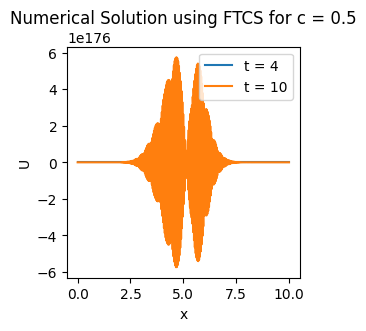

In [ ]:
def plot_u_at_t(U, time, x, title, dt = dt, nt = nt):
  fn = U[time]
  t1 = int(4/dt)
  t2 = int(10/dt)
  # print(t1, t2)
  fn1 = U[t1-1]
  fn2 = U[t2-1]
  # fn1 = U[]
  plt.figure(figsize = (3, 3))

  plt.plot(x, fn1)
  plt.plot(x, fn2)
  plt.legend(["t = 4", "t = 10"])
  plt.xlabel("x")
  plt.ylabel("U")
  plt.title(title)
plot_u_at_t(U_ftcs, -1, x, title = "Numerical Solution using FTCS for c = 0.5")

## Lax Freidrichs Scheme

In [ ]:
def lax_freidrichs(u, c, x, t):
  for i in range(1, len(t)):
    for j in range(0, len(x)):
      if j == 0:
        u[i,j] = 0.5*(u[i-1,j+1] + u[i-1,-2]) - 0.5*c*(u[i-1,j+1] - u[i-1,-2])
      elif j == len(x)-1:
      #Update boundary condition
        u[i, j] = u[i, 0]
      else:
        u[i,j] = 0.5*(u[i-1,j+1] + u[i-1,j-1]) - 0.5*c*(u[i-1,j+1] - u[i-1,j-1])

        
  return u

In [ ]:
U_lf = initializeU_and_solve(lax_freidrichs)

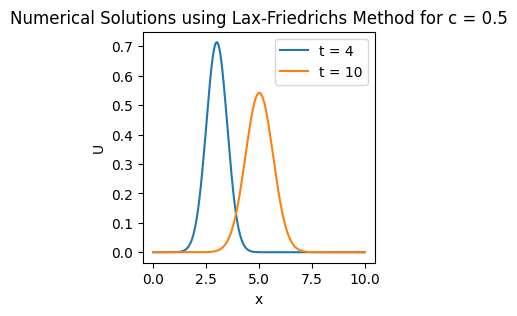

In [ ]:
plot_u_at_t(U_lf, -1, x, title = "Numerical Solutions using Lax-Friedrichs Method for c = 0.5")

## Upwind 1

In [ ]:
def upwind1(u, c, x, t):
  for i in range(1, len(t)):
    for j in range(0, len(x)):
      if j == 0:
        u[i,j] = u[i-1,j] - c*(u[i-1,j] - u[i-1,-2])
      elif j == len(x)-1:
      #Update boundary condition
        u[i, j] = u[i, 0]
      else:
        u[i,j] = u[i-1,j] - c*(u[i-1,j] - u[i-1,j-1])

  return u

In [ ]:
U_upwind1 = initializeU_and_solve(upwind1)
U_upwind1.shape

(4000, 1000)

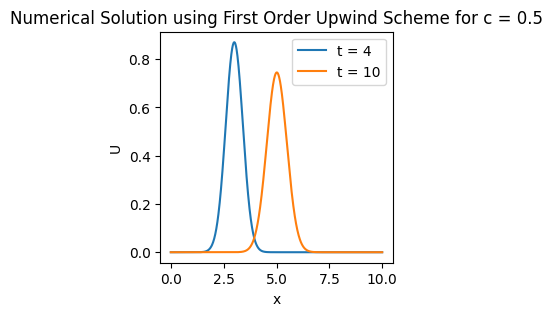

In [ ]:
plot_u_at_t(U_upwind1, -1, x, title = "Numerical Solution using First Order Upwind Scheme for c = 0.5")

In [ ]:
x.shape

(1000,)

## Upwind 2

In [ ]:
def upwind2(u, c, x, t):
  for i in range(1, len(t)):
    for j in range(0, len(x)):
      if j == 1:
        u[i,j] = u[i-1,j] - 0.5*c*(3*u[i-1,j] - 4*u[i-1,j-1] + u[i-1,-2]) + 0.5*c**2*(u[i-1,j] - 2*u[i-1,j-1] + u[i-1,-2])

      elif j==0:
        u[i,j] = u[i-1,j] - 0.5*c*(3*u[i-1,j] - 4*u[i-1,-2] + u[i-1,-3]) + 0.5*c**2*(u[i-1,j] - 2*u[i-1,-2] + u[i-1,-3])

      elif j == len(x)-1:
        u[i, j] = u[i, 0]

      else:
        u[i,j] = u[i-1,j] - 0.5*c*(3*u[i-1,j] - 4*u[i-1,j-1] + u[i-1,j-2]) + 0.5*c**2*(u[i-1,j] - 2*u[i-1,j-1] + u[i-1,j-2])

  return u

In [ ]:
U_upwind2 = initializeU_and_solve(upwind2)
U_upwind2.shape

(4000, 1000)

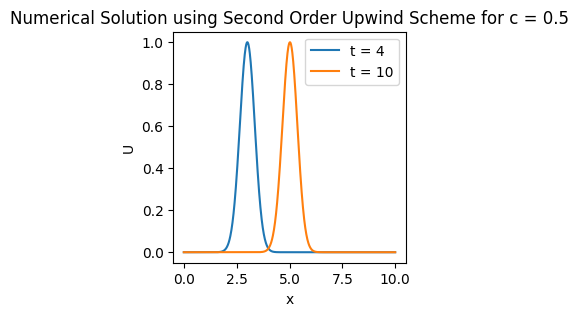

In [ ]:
plot_u_at_t(U_upwind2, -1, x, title = "Second Order Upwind Scheme for c = 0.5")

## Leapfrog scheme

In [ ]:
def leapfrog(u, c, x, t):
  # u[1] = U_ftcs[1] #first step calc using ftcs
  # for i in range(1, len(t)):
  #   for j in range(0, len(x)):
  #     if i == 1:
  #       if j == 0:
  #         u[i, j] = u[i-1, j] - (c/2)*(u[i-1, j+1] - u[i-1, -2]) + (c**2/2)*(u[i-1, j+1] - 2*u[i-1, j] + u[i-1, -2])
  #       elif j == len(x)-1:
  #         u[i, j] = u[i, 0]
  #       else:
  #         u[i, j] = u[i-1, j] - (c/2)*(u[i-1, j+1] - u[i-1, j-1]) + (c**2/2)*(u[i-1, j+1] - 2*u[i-1, j] + u[i-1, j-1])
      
  #     else:
  #       if j == 0:
  #         u[i,j] = u[i-2,j] - c*(u[i-1, j+1] - u[i-1, -2])
  #       elif j == len(x)-1:
  #         u[i, j] = u[i, 0]
  #       else:
  #         u[i,j] = u[i-2,j] - c*(u[i-1, j+1] - u[i-1, -2])
  n_t = len(t)
  n_x = len(x)
  u = u.T
  for k in range(1,n_t): 
  #Update Interior Points
    for i in range(0,n_x):
      if k == 1:
        if i == 0:
          u[i, k] = u[i, k-1] - (c/2)*(u[i+1, k-1] - u[-2, k-1]) + (c**2/2)*(u[i+1, k-1] - 2*u[i, k-1] + u[-2, k-1])
        elif i == n_x-1:
          #Update Boundary Conditions
          u[n_x-1, k] = u[0, k]
        else:
          u[i, k] = u[i, k-1] - (c/2)*(u[i+1, k-1] - u[i-1, k-1]) + (c**2/2)*(u[i+1, k-1] - 2*u[i, k-1] + u[i-1, k-1]) #Using two time level scheme : Single Step Lax Wendroff Scheme to get the values at 1st time stamp because it is also 2nd order accurate
      else:
        if i == 0:
          u[i, k] = u[i, k-2] - c*(u[i+1, k-1] - u[-2, k-1])
        elif i == n_x-1:
          #Update Boundary Conditions
          u[n_x-1, k] = u[0, k]
        else:
          u[i, k] = u[i, k-2] - c*(u[i+1, k-1] - u[i-1, k-1])   
  return u.T

In [ ]:
U_leapfrog = initializeU_and_solve(leapfrog)
U_leapfrog

array([[ 3.72007598e-44,  5.54969899e-44,  8.27254076e-44, ...,
         8.27254076e-44,  5.54969899e-44,  3.72007598e-44],
       [ 4.17748173e-44,  4.52323514e-44,  6.74536693e-44, ...,
         1.01312205e-43,  6.79946753e-44,  4.17748173e-44],
       [ 4.85819217e-44,  4.26575639e-44,  5.50860590e-44, ...,
         1.24145292e-43,  8.52656837e-44,  4.85819217e-44],
       ...,
       [ 2.67171502e-16,  4.52026653e-17,  1.49983213e-16, ...,
         8.98095587e-16,  4.86251698e-16,  2.67171502e-16],
       [-9.88931305e-17, -2.58757020e-16,  3.33262172e-16, ...,
        -1.57520552e-16,  1.19806317e-16, -9.88931305e-17],
       [ 4.56453171e-16, -1.70874986e-16,  3.48430870e-17, ...,
         2.61142404e-16,  4.56937987e-16,  4.56453171e-16]])

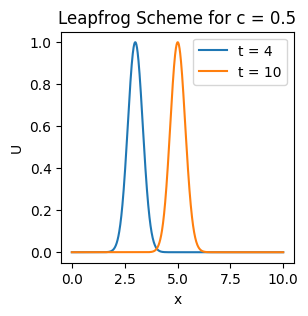

In [ ]:
plot_u_at_t(U_leapfrog, -1, x, title = "Leapfrog Scheme for c = 0.5")

## Lax Wendroff single step

In [ ]:
def lax_wendroff(u, c, x, t):
  # u[1] = U_ftcs[1]
  for i in range(1, len(t)):
    for j in range(0, len(x)):
      if j ==0:
        u[i,j] = u[i-1,j] - c/2*(u[i-1, j+1] - u[i-1, -2]) + c**2/2*(u[i-1, j+1] - 2*u[i-1][j] + u[i-1, -2])
      elif j == len(x)-1:
        u[i, j] = u[i, 0]
      else:
        u[i,j] = u[i-1,j] - c/2*(u[i-1, j+1] - u[i-1, j-1]) + c**2/2*(u[i-1, j+1] - 2*u[i-1][j] + u[i-1, j-1])

  return u

In [ ]:
U_lwsingle = initializeU_and_solve(lax_wendroff)
U_lwsingle.shape

(4000, 1000)

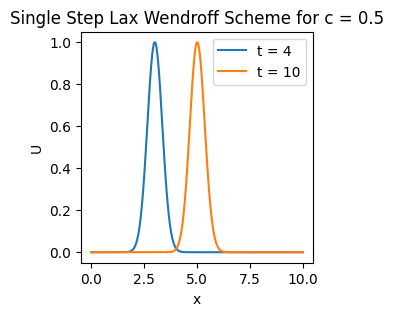

In [ ]:
plot_u_at_t(U_lwsingle, -1, x, title = "Single Step Lax Wendroff Scheme for c = 0.5")

## QUICK scheme

In [ ]:
def quick(u, c, x, t):
  n_t = len(t)
  n_x = len(x)
  u = u.T
  for k in range(1,n_t):
    #Update Interior Points
    for i in range(0,n_x):
      if i == 0:
        u[i, k] = u[i, k-1] - (c/8)*(3*u[i+1, k-1] + 3*u[i, k-1] - 7*u[-2, k-1]+ u[-3, k-1]) + 0.5*c**2*(u[i,k-1] - 2*u[-2,k-1] + u[-3,k-1])
      elif i == 1:
        u[i, k] = u[i, k-1] - (c/8)*(3*u[i+1, k-1] + 3*u[i, k-1] - 7*u[i-1, k-1]+ u[-2, k-1]) + 0.5*c**2*(u[i,k-1] - 2*u[i-1,k-1] + u[-2,k-1])
      elif i == n_x-1:
        #Update Boundary Conditions
        u[n_x-1, k] = u[0, k]
      else:
        u[i, k] = u[i, k-1] - (c/8)*(3*u[i+1, k-1] + 3*u[i, k-1] - 7*u[i-1, k-1]+ u[i-2, k-1]) + 0.5*c**2*(u[i,k-1] - 2*u[i-1,k-1] + u[i-2,k-1])
  return u.T

In [ ]:
U_quick = initializeU_and_solve(quick)
U_quick.shape

(4000, 1000)

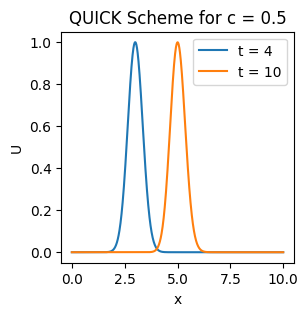

In [ ]:
plot_u_at_t(U_quick, -1, x, title = "QUICK Scheme for c = 0.5")

In [ ]:
# u[i, j] = u[i-1, j] - (c*dt/2)*((3*u[i] - 4*u[i-1] + u[i-2])/dx + (u[i+1] - u[i-1])/(2*dx))

## Warming-Kutler-Lomax

In [ ]:
def wkl(u, c, x, t):
  n_t = len(t)
  n_x = len(x)
  u = u.T
  for k in range(1,n_t):

    for i in range(0,n_x):
      if i == 0:
        u[i,k] = u[i, k-1] - (c/2)*(u[i+1, k-1] - u[-2, k-1]) - (c/6)*(-u[i+1, k-1] + 3*u[i,k-1] - 3*u[-2, k-1] + u[-3, k-1]) + 0.5*c**2*(u[i,k-1] - 2*u[-2,k-1] + u[-3,k-1])
      elif i == 1:
        u[i,k] = u[i, k-1] - (c/2)*(u[i+1, k-1] - u[i-1, k-1]) - (c/6)*(-u[i+1, k-1] + 3*u[i,k-1] - 3*u[i-1, k-1] + u[-2, k-1]) + 0.5*c**2*(u[i,k-1] - 2*u[i-1,k-1] + u[-2,k-1])
      elif i == n_x-1:

        u[n_x-1, k] = u[0, k]
      else:
        u[i,k] = u[i, k-1] - (c/2)*(u[i+1, k-1] - u[i-1, k-1]) - (c/6)*(-u[i+1, k-1] + 3*u[i,k-1] - 3*u[i-1, k-1] + u[i-2, k-1]) + 0.5*c**2*(u[i,k-1] - 2*u[i-1,k-1] + u[i-2,k-1])
  return u.T

In [ ]:
U_wkl = initializeU_and_solve(wkl)
U_wkl

array([[ 3.72007598e-44,  5.54969899e-44,  8.27254076e-44, ...,
         8.27254076e-44,  5.54969899e-44,  3.72007598e-44],
       [ 4.06223059e-44,  4.63848628e-44,  6.72733340e-44, ...,
         1.01579257e-43,  6.81750107e-44,  4.06223059e-44],
       [ 4.90899289e-44,  4.23707345e-44,  5.54456463e-44, ...,
         1.24700406e-43,  8.45787972e-44,  4.90899289e-44],
       ...,
       [-6.78760695e-24,  1.57371854e-22,  2.93111832e-22, ...,
        -2.25002492e-22, -1.46853944e-22, -6.78760695e-24],
       [-7.82563881e-23,  8.10325837e-23,  2.37421696e-22, ...,
        -2.35839247e-22, -1.93066021e-22, -7.82563881e-23],
       [-1.40072911e-22,  3.72471341e-24,  1.68677620e-22, ...,
        -2.29957180e-22, -2.23340462e-22, -1.40072911e-22]])

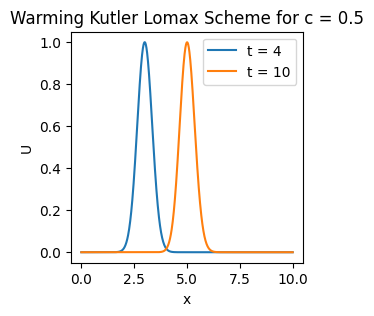

In [ ]:
plot_u_at_t(U_wkl, -100, x, title = "Warming Kutler Lomax Scheme for c = 0.5")

## ENO second order

In [ ]:
def S(x):
  if x > 0:
    return 1
  elif x < 0:
    return -1
  else:
    return 0

In [ ]:
def minmod(p, q):
  if p*q > 0:
    return S(p) * min(abs(p), abs(q))
  else:
    return 0

In [ ]:
def eno(u, c, x, t):
  n_t = len(t)
  n_x = len(x)
  for i in range(1, len(t)):
    for j in range(0, len(x)):
      if j == 0:
        mm = minmod( (u[i-1, j+1] - 2*u[i-1, j] + u[i-1, -2]) , (u[i-1, j] - 2*u[i-1, -2] + u[i-1, -3]) )
        u[i,j] = u[i-1,j] - c*( (u[i-1, j] - u[i-1, -2]) + 1/2*mm )
      elif j ==1:
        mm = minmod( (u[i-1, j+1] - 2*u[i-1, j] + u[i-1, j-1]) , (u[i-1, j] - 2*u[i-1, j-1] + u[i-1, -2]) )
        u[i,j] = u[i-1,j] - c*( (u[i-1, j] - u[i-1, j-1]) + 1/2*mm )
      elif j == n_x -1:
        u[i, j] = u[i, 0]
      else:
        mm = minmod( (u[i-1, j+1] - 2*u[i-1, j] + u[i-1, j-1]) , (u[i-1, j] - 2*u[i-1, j-1] + u[i-1, j-2]) )
        u[i,j] = u[i-1,j] - c*( (u[i-1, j] - u[i-1, j-1]) + 1/2*mm )
  return u

In [ ]:
U_eno = initializeU_and_solve(eno)
U_eno

array([[ 3.72007598e-44,  5.54969899e-44,  8.27254076e-44, ...,
         8.27254076e-44,  5.54969899e-44,  3.72007598e-44],
       [ 4.41158280e-44,  4.41158280e-44,  6.68781519e-44, ...,
         9.96546753e-44,  6.68781519e-44,  4.41158280e-44],
       [ 5.29934401e-44,  3.84252470e-44,  5.29934401e-44, ...,
         1.20029077e-43,  8.07628637e-44,  5.29934401e-44],
       ...,
       [-7.76727633e-42, -7.76727633e-42, -7.75028798e-42, ...,
        -7.71740532e-42, -7.75028798e-42, -7.76727633e-42],
       [-7.76275573e-42, -7.77152341e-42, -7.76275573e-42, ...,
        -7.69702929e-42, -7.73777330e-42, -7.76275573e-42],
       [-7.75420492e-42, -7.77119326e-42, -7.77119326e-42, ...,
        -7.67273299e-42, -7.72132226e-42, -7.75420492e-42]])

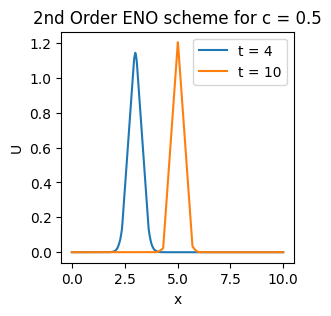

In [ ]:
plot_u_at_t(U_eno, -1, x, title = "2nd Order ENO scheme for c = 0.5")

## Mac Cormack

In [ ]:
def mac(u, c, x, t):
  u_pred = u.copy()
  for i in range(1, len(t)):
    for j in range(0, len(x)):
      if j == len(x)-1:
        u_pred[i, j] = u_pred[i, 0]
      else:
        u_pred[i, j] = u[i-1][j] - c*(u[i-1, j+1] - u[i-1, j])
    for j in range(0, len(x)):
      if j == 0:
        u[i, j] = 0.5*(u[i-1, j] + u_pred[i, j]) - c/2*(u_pred[i, j] - u_pred[i, -2])
      elif j == len(x) -1:
        u[i, j] = u[i, 0]
      else:
        u[i, j] = 0.5*(u[i-1, j] + u_pred[i, j]) - c/2*(u_pred[i, j] - u_pred[i, j-1])

  return u

In [ ]:
U_mac = initializeU_and_solve(mac)
U_mac

array([[ 3.72007598e-44,  5.54969899e-44,  8.27254076e-44, ...,
         8.27254076e-44,  5.54969899e-44,  3.72007598e-44],
       [ 4.17748173e-44,  4.52323514e-44,  6.74536693e-44, ...,
         1.01312205e-43,  6.79946753e-44,  4.17748173e-44],
       [ 5.11750723e-44,  4.11581114e-44,  5.49885027e-44, ...,
         1.24047736e-43,  8.37662311e-44,  5.11750723e-44],
       ...,
       [ 5.36305713e-30, -7.98580896e-32, -4.98798314e-30, ...,
         4.41161457e-30,  7.29339206e-30,  5.36305713e-30],
       [ 6.76729713e-30,  2.57475075e-30, -3.16565397e-30, ...,
         1.83430038e-30,  6.45401736e-30,  6.76729713e-30],
       [ 7.17388551e-30,  4.86450623e-30, -6.87667538e-31, ...,
        -1.04314608e-30,  4.68246353e-30,  7.17388551e-30]])

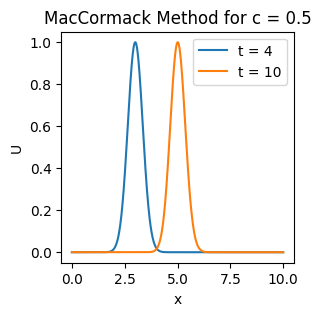

In [ ]:
plot_u_at_t(U_mac, -1, x, title = "MacCormack Method for c = 0.5")

## Multi step BeamWarming

In [ ]:
def bw(u, c, x, t): #some problem ?? see last timestep
  u_pred = u.copy()
  for i in range(1, len(t)):
    for j in range(1, len(x)-1):
      u_pred[i, j] = 0.5*(u[i-1, j+1] + u[i-1, j-1]) - c/4*(u[i-1, j+1] - u[i-1, j-1])
  # for i in range(1, len(t)):
    for j in range(1, len(x)-1):
      u[i, j] = u[i-1, j] - c/2*(u_pred[i-1, j+1] - u_pred[i-1, j-1])
  return u

In [ ]:
U_bw = initializeU_and_solve(bw)
U_bw

array([[ 3.72007598e-44,  5.54969899e-44,  8.27254076e-44, ...,
         8.27254076e-44,  5.54969899e-44,  3.72007598e-44],
       [ 0.00000000e+00,  4.41158280e-44,  6.57961398e-44, ...,
         9.96546753e-44,  6.68781519e-44,  0.00000000e+00],
       [ 0.00000000e+00,  2.38931051e-44,  4.92472768e-44, ...,
         1.19648672e-43,  9.13331917e-44,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -7.14771301e-37,  7.19090896e-37, ...,
         2.03889983e+00,  3.41644723e+01,  0.00000000e+00],
       [ 0.00000000e+00, -9.67962297e-37,  6.17212519e-37, ...,
         2.04265279e+00,  3.46732921e+01,  0.00000000e+00],
       [ 0.00000000e+00, -1.17708345e-36,  4.74292747e-37, ...,
         2.04576928e+00,  3.51831254e+01,  0.00000000e+00]])

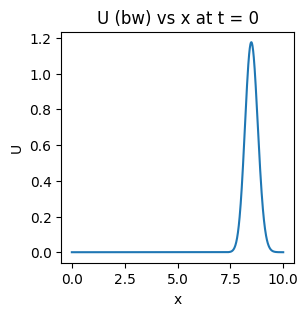

In [ ]:
plot_u_at_t(U_bw, -300, x, title = "U (bw) vs x at t = 0")

## Multi step lax wendroff

In [ ]:
def mlw(u, c, x, t):
  u_pred = u.copy()
  u_half_plus = u[1].copy()
  # print(u_half_plus)
  u_half_minus = u[1].copy()
  for i in range(1, len(t)):

    for j in range(0, len(x)):
      if j == len(x) -1:
        u_half_plus[j] == u_half_plus[0]
      else:
        u_half_plus[j] = 0.5*(u[i-1, j+1] + u[i-1, j]) - c/2*(u[i-1, j+1] - u[i-1, j]) 

    for k in range(0, len(x)):
      if k == 0:
        u_half_minus[k] = 0.5*(u[i-1, k] + u[i-1, -2]) - c/2*(u[i-1, k] - u[i-1, -2])
      else:
        u_half_minus[k] = 0.5*(u[i-1, k] + u[i-1, k-1]) - c/2*(u[i-1, k] - u[i-1, k-1])

    u[i, 0] = u[i-1, 0] - c/2*u_half_plus[0]
    u[i, -1] = u[i-1, -1] - c/2*u_half_minus[-1]
    for p in range(1, len(x)-1):        
      u[i, p] = u[i-1, p] - c/2*(u_half_plus[p] - u_half_minus[p])
  return u

In [ ]:
U_mlw = initializeU_and_solve(mlw)
U_mlw

array([[ 3.72007598e-044,  5.54969899e-044,  8.27254076e-044, ...,
         8.27254076e-044,  5.54969899e-044,  3.72007598e-044],
       [ 2.67570554e-044,  5.03646707e-044,  7.50895384e-044, ...,
         9.20188062e-044,  6.17458326e-044,  2.44700267e-044],
       [ 1.85923156e-044,  4.43929386e-044,  6.81553122e-044, ...,
         1.02349388e-043,  6.97517530e-044,  1.13633064e-044],
       ...,
       [-5.70072973e-229,  2.40294715e-228,  3.31193954e-228, ...,
        -7.86969510e+000,  2.36090853e+001, -7.08272559e+001],
       [-6.13368487e-229,  1.78869385e-228,  4.35185505e-228, ...,
        -7.86969510e+000,  2.36090853e+001, -7.08272559e+001],
       [-6.10155261e-229,  1.17810959e-228,  4.92395941e-228, ...,
        -7.86969510e+000,  2.36090853e+001, -7.08272559e+001]])

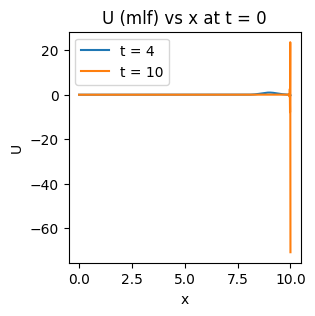

In [ ]:
plot_u_at_t(U_mlw, -1, x, title = "U (mlf) vs x at t = 0")

## Multi step Ritchmyer 

In [ ]:
def ritch(u, c, x, t):
  u_pred = u.copy()
  u_half = u[1].copy()

  for i in range(1, len(t)):

    for j in range(0, len(x)):
      if j == 0:
        u_half[j] = 0.5*(u[i-1, j+1] + u[i-1, -2]) - c/2*(u[i-1, j+1] - u[i-1, -2])
      elif j == len(x) -1:
        u_half[j] = u_half[0] 
      else:
        u_half[j] = 0.5*(u[i-1, j+1] + u[i-1, j-1]) - c/2*(u[i-1, j+1] - u[i-1, j-1])

    for p in range(0, len(x)):
      # if p == 1:
      #   u[i, p] = u[i-1, p] - c/2*(u_half[p+1] - u_half[-1])
      if p == 0:
        u[i, p] = u[i-1, p] - c/2*(u_half[p+1] - u_half[-2])

      elif p== len(x) -1:
        u[i, p] = u[i, 0]
      else:
        u[i, p] = u[i-1, p] - c/2*(u_half[p+1] - u_half[p-1])
  return u

In [ ]:
U_r = initializeU_and_solve(ritch)
U_r

array([[3.72007598e-44, 5.54969899e-44, 8.27254076e-44, ...,
        8.27254076e-44, 5.54969899e-44, 3.72007598e-44],
       [4.28913407e-44, 5.12646730e-44, 6.78991116e-44, ...,
        1.04441972e-43, 6.81939407e-44, 4.28913407e-44],
       [5.28690984e-44, 5.13194977e-44, 5.80389325e-44, ...,
        1.32065281e-43, 8.56166309e-44, 5.28690984e-44],
       ...,
       [1.01528451e-21, 8.46844285e-22, 7.06131092e-22, ...,
        1.45798761e-21, 1.21685232e-21, 1.01528451e-21],
       [1.11761343e-21, 9.32359968e-22, 7.77573734e-22, ...,
        1.60437257e-21, 1.33926187e-21, 1.11761343e-21],
       [1.23013325e-21, 1.02640880e-21, 8.56159179e-22, ...,
        1.76527887e-21, 1.47383828e-21, 1.23013325e-21]])

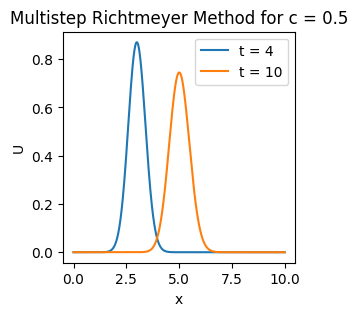

In [ ]:
plot_u_at_t(U_r, -300, x, title = "Multistep Richtmeyer Method for c = 0.5")